In [7]:
import	csv
f=open('subwayfee.csv',	encoding='utf-8-sig')
data=csv.reader(f)
header=	next(data) # 열 이름 읽어서 header 변수에 저장하기
print(header) # 열 이름 출력
i =	1
for	row	in	data:
	print(row)
	if	i >	5: # 5 줄 출력
		break
	i +=	1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2023-12', '1호선', '0150', '서울역', '1442704 ', '1404121 ', '211843 ', '203808 ']
['2023-12', '1호선', '0151', '시청', '696784 ', '684254 ', '99882 ', '98107 ']
['2023-12', '1호선', '0152', '종각', '1010849 ', '985165 ', '162696 ', '152064 ']
['2023-12', '1호선', '0153', '종로3가', '488467 ', '450427 ', '310689 ', '286850 ']
['2023-12', '1호선', '0154', '종로5가', '483866 ', '476917 ', '246504 ', '239266 ']
['2023-12', '1호선', '0155', '동대문', '236114 ', '228110 ', '128542 ', '127639 ']


In [8]:
# 전체 탑승 인원 대비 유임 승차 비율이 가장 높은 역은?

import	csv
f=open('subwayfee.csv',encoding='utf-8-sig')
data=csv.reader(f)
header=	next(data) # 열 이름을 저장하고 출력하지는 않는다
max_rate=0
rate=0
for	row	in	data:
	for	i in range(4,8): # 유임승차[4], 유임하차[5], 무임승차[6], 무임하차[7] 열 순번
		row[i]= int(row[i])	#	4,5,6,7	컬럼 값을 정수로 변환
	rate=row[4]/row[6]	 #[6]컬럼의 값이 0인 행 확인 용도
	if	rate>max_rate:
		max_rate =rate
print(max_rate)
f.close()

ZeroDivisionError: division by zero

In [11]:
# 전체 탑승 인원 대비 유임 승차 비율이 가장 높은 역은?
#무임승차 인원이 0인 역 찾기 #1
import	csv
f=open('subwayfee.csv',encoding='utf-8-sig')
data=csv.reader(f)
header=	next(data) # 열 이름을 저장하고 출력하지는 않는다
max_rate=0
rate=0
for	row	in	data:
    for	i in range(4,8): # 유임승차[4], 유임하차[5], 무임승차[6], 무임하차[7] 열 순번
        row[i]= int(row[i])	#	4,5,6,7	컬럼 값을 정수로 변환
    rate=row[4]/(row[4]+row[6])	 #[6]컬럼의 값이 0인 행 확인 용도
    if	row[6]==0 :
        print(row)

f.close()

['2023-12', '일산선', '1949', '지축', 8, 0, 0, 0]
['2023-12', '경의선', '1295', '김포공항', 1, 0, 0, 0]
['2023-12', '6호선', '2649', '신내', 10, 0, 0, 0]
['2023-12', '7호선', '2755', '춘의', 1, 0, 0, 0]
['2023-12', '7호선', '2756', '신중동', 1, 0, 0, 0]
['2023-12', '7호선', '2760', '굴포천', 1, 0, 0, 0]


In [13]:
# 최대 무임 승차 비율 확인
import	csv
f=open('subwayfee.csv',	encoding='utf-8-sig')
data=csv.reader(f)
header=	next(data)
max_rate = 0
for	row	in	data:
	for	i in range(4,	8):
		row[i]	=int(row[i])	#4,5,6,7 컬럼 값을 정수로 변환
	if	row[6]	!=	0:
		#	무임 승차 (%)=(무임 승차 수 x100)/(유임 승차 수 +무임 승차 수)
		rate=(row[6]*100)/(row[4]+row[6])
		if	rate>max_rate:
			max_rate =rate
			print(row,round(rate,2),'%')
f.close()

['2023-12', '1호선', '0150', '서울역', 1442704, 1404121, 211843, 203808] 12.8 %
['2023-12', '1호선', '0152', '종각', 1010849, 985165, 162696, 152064] 13.86 %
['2023-12', '1호선', '0153', '종로3가', 488467, 450427, 310689, 286850] 38.88 %
['2023-12', '1호선', '0157', '제기동', 231358, 219338, 256218, 272510] 52.55 %
['2023-12', '경원선', '1916', '소요산', 22856, 19642, 40555, 37554] 63.96 %
['2023-12', '경원선', '1919', '연천', 10626, 10601, 20838, 21191] 66.23 %


In [16]:
# 최대 유임 승차 인원이 있는 역은? #2

import	csv
f=open('subwayfee.csv',	encoding='utf-8-sig')
data=csv.reader(f)
next(data)
max_rate =	0
max_row =[]
max_total_num =	0
for	row	in	data:
    for	i in range(4,8)	:
        row[i]=int(row[i])
    total_count =row[4]	+row[6]	#	유임승차수 +무임승차수
    if	(row[6]	!=0) and (total_count >100000): # 10만명이 넘게 승,하차 하는 역에서 유임 승차 비율이 제일 높은 역은?
                                                # 유동 인구가 많은 지하철 역 중에서 비교한다!
        rate=row[4]/total_count
        if	rate>max_rate :
            max_rate =rate
            max_row =row
            max_total_num =	total_count
print()
print(f"호선명:	{max_row[1]},	역이름:	{max_row[3]},	전체 인원:	{max_total_num:,}명,	"
f"유임승차인원:	{max_row[4]:,}명,	유임승차 비율:	{round(max_rate *	100,	2):,}%")
f.close()


호선명:	공항철도 1호선,	역이름:	홍대입구,	전체 인원:	464,662명,	유임승차인원:	444,277명,	유임승차 비율:	95.61%


['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2023-12', '1호선', '0157', '제기동', 231358, '219338 ', 256218, '272510 '] 0.47
['2023-12', '1호선', '0159', '동묘앞', 144443, '150931 ', 146515, '148571 '] 0.5
['2023-12', '경원선', '1916', '소요산', 22856, '19642 ', 40555, '37554 '] 0.36
['2023-12', '경원선', '1919', '연천', 10626, '10601 ', 20838, '21191 '] 0.34
['2023-12', '중앙선', '1218', '원덕', 4951, '4673 ', 5471, '5273 '] 0.48

유임 승차 비율이 가장 낮은 역:	연천
전체 인원:31,464명,유임승차인원:10,626명,유임승차비율:33.8%


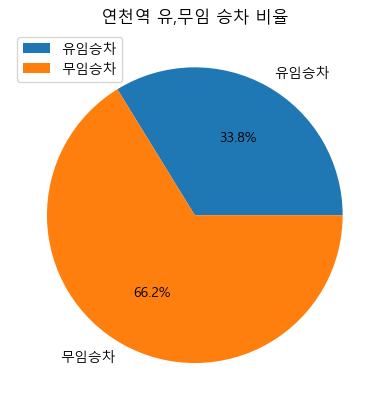

In [19]:
# 유임 승차 비율이 50% 이하인 역
# 서울 지하철 노선에서 유임 승차 비율이 50% 이하이고,
# 총 승차 인원이 10,000명 이상을 모두 출력
# 유임 승차 비율이 가장 낮은 역의 비율을 파이 차트로 표시하시오
import	csv
import	matplotlib.pyplot as plt
import	platform

f=open('subwayfee.csv',	encoding='utf-8-sig')
data=csv.reader(f)
header=next(data)
print(header) # 열 이름 출력
min_rate =100 # 최소 비율을 100으로 제일 높게 설정
min_row =[] # 최소 비율에 해당하는 행 값
min_total_count =0
for	row	in	data:
    for	i in [4,6]: # 유임승차[4]랑 무임승차[6] 열의 값만 읽어옴
        row[i]=int(row[i])
    total_count =row[4]	+row[6] # 총 탑승 인수를 계산
    if	(row[6]	!=	0)	and	(total_count >=	10000):	 #무임승차 인원이 없고,총 승차인원이 1만명 이상인 경우만 들어옴
        rate=row[4]	/total_count # 비율을 구함
        if	rate<=	0.5: # 비율이 50% 이하라면
            print(row,	round(rate,	2)) # 해당 행의 값과 비율을 반올림하여 출력
            if	rate<min_rate: # 최솟값 갱신
                min_rate =rate
                min_row =row
                min_total_count =total_count
f.close()
print()
print(f'유임 승차 비율이 가장 낮은 역:	{min_row[3]}') # 지하철역 출력
print(f'전체 인원:{min_total_count:,}명,'
						f'유임승차인원:{min_row[4]:,}명,'
						f'유임승차비율:{round(min_rate*100,	1)}%')
if	platform.system()=='Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
    
plt.title(min_row[3]	+	"역 유,무임 승차 비율") # 지하철역 출력
label=['유임승차','무임승차']
values=[min_row[4],min_row[6]]
plt.pie(values,	labels=label,autopct='%.1f%%') # 퍼센테이지 자동 계산 (%, .1f,  %%  => 지정서식용 %, 소수점 1자리까지 출력, "%" 출력)
plt.legend(loc=2)
plt.show()

In [22]:
# 모든 역의 유임승차, 유임하차, 무임승차, 무임하차 인원 분석
import csv
max=[0]*4
max_station=['']*4
label=["유임승차","유임하차", "무임승차", "무임하차"]

#with 구문 : 자동으로 파일을 close() 시킴
with open('subwayfee.csv', 'r', encoding='utf-8') as f:
    data=csv.reader(f)
    next(data)
    for row in data:
        for i in range(4,8):
            row[i]=int(row[i])
            if row[i]>max[i-4]: # 4-8 -> 0-4로 인덱스 변환 필요
                max[i-4]=row[i] # 최댓값 갱신
                max_station[i-4]=row[3]+" "+row[1] # 지하철명 + 호선명 출력
for i in range(4) :
    print(f'{label[i]}: {max_station[i]} {max[i]:,}명') # :, 으로 세 자릿수마다 쉼표 출력

유임승차: 잠실(송파구청) 2호선 2,407,622명
유임하차: 잠실(송파구청) 2호선 2,389,008명
무임승차: 종로3가 1호선 310,689명
무임하차: 영등포 경부선 307,586명


In [33]:
import	csv
import	matplotlib.pyplot as	plt
import	platform
import  koreanize_matplotlib
label=['유임승차',	'유임하차',	'무임승차',	'무임하차']
color_list =['#ff9999',	'#ffc000',	'#8fd9b6',	'#d395d0']	 #	파이 차트 컬러 값
pic_count =	0
with open('subwayfee.csv',	encoding='utf-8-sig')	as	f:
    data=csv.reader(f)
    next(data)
    if(platform.system()==	'Windows'):
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
    for	row	in	data:
        for	i in range(4,8):
            row[i]	=int(row[i])
        print(row)
        plt.figure(dpi=100)	#저장할 그림파일의 dpi	설정
        plt.title(row[3]	+	'	'	+	row[1])
        plt.pie(row[4:8],labels=label,colors=color_list,autopct ='%.1f%%',shadow=True)
        plt.savefig('img/'+row[3]+row[1]+'.png')
        plt.close()	#파일 닫기 -> savefig로 이미지를 생성했기 때문에 닫아줘야 한다
        pic_count +=1
        if	pic_count >=10:
            break

['2023-12', '1호선', '0150', '서울역', 1442704, 1404121, 211843, 203808]
['2023-12', '1호선', '0151', '시청', 696784, 684254, 99882, 98107]
['2023-12', '1호선', '0152', '종각', 1010849, 985165, 162696, 152064]
['2023-12', '1호선', '0153', '종로3가', 488467, 450427, 310689, 286850]
['2023-12', '1호선', '0154', '종로5가', 483866, 476917, 246504, 239266]


C:\Users\mathn\AppData\Local\Temp\ipykernel_33348\318946348.py:22: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('img/'+row[3]+row[1]+'.png')


['2023-12', '1호선', '0155', '동대문', 236114, 228110, 128542, 127639]
['2023-12', '1호선', '0156', '신설동', 289402, 276992, 120282, 116775]
['2023-12', '1호선', '0157', '제기동', 231358, 219338, 256218, 272510]
['2023-12', '1호선', '0158', '청량리(서울시립대입구)', 380606, 372443, 274847, 276209]
['2023-12', '1호선', '0159', '동묘앞', 144443, 150931, 146515, 148571]
